In [14]:
# установим библиотеки
import pandas as pd
import numpy as np

# Matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
# Internal python tool for setting figure size
from IPython.core.pylabtools import figsize

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns',  16)

Загрузим данные для обучения и тестирования

# 1. Загрузка данных и проверка на пропуски

Загрузим данные для обучения и тестирования

In [66]:
df = pd.read_csv('data/day.csv')

Посмотрим данные, наименование, тип количество

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Все данные числовые, на первый взгляд пропусков нет. Но посмотрим описательную статистику

In [68]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Явных отклонений не обнаруживается, можно переходить к анализу данных

# Анализ данных: 
Исследуем сезонные и временные паттерны в данных о прокате велосипедов. Построим графики зависимости спроса на велосипеды от погодных условий, времени суток и дня недели. 


Примем нашей целевой переменной столбец 'cnt': общее количество арендованных велосипедов как зарегистрированными, так и случайными клиентами.
Посмотрим распределение

Text(0.5, 1.0, 'Распределение ежедневного количества арендуемых велосипедов')

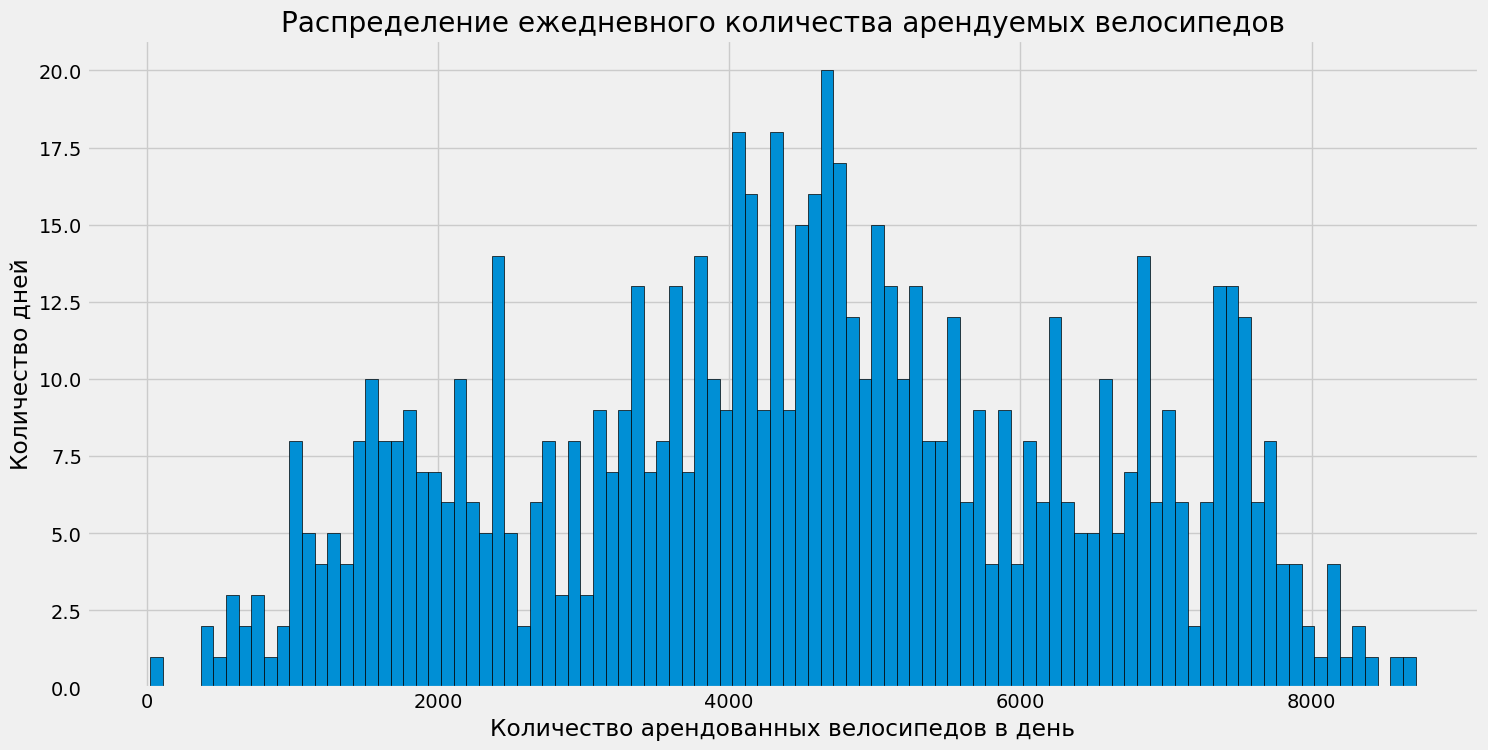

In [69]:
figsize(16, 8)

# Гистограмма по количеству арендованных велосипедов
plt.style.use('fivethirtyeight')
plt.hist(df['cnt'], bins=100, edgecolor='k')
plt.xlabel('Количество арендованных велосипедов в день')
plt.ylabel('Количество дней')
plt.title('Распределение ежедневного количества арендуемых велосипедов')

Распределение отдаденно напоминает нормальное. Есть некоторые выбросы в начале и конце. На минимуме, возможно это были случайные арендаторы в "нелетную" погоду. В конце видимо какие то праздники с экстримальным количеством арендаторов.

Посмотрим "нижнюю" границу

In [70]:
df.loc[df['cnt'] == 22, :]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


29 октября, легкий снег или дождь, видимо действительно "экстрималы". Проверим описание без данного значения

In [71]:
df[df['cnt'] > 22]['cnt'].describe()

count     730.000000
mean     4510.489041
std      1931.408300
min       431.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

Теперь проверим верхнюю границу. Однако учитывая, что по графику видно несколько значений. Выведем "хвост" отсортированного списка

In [72]:
df['cnt'].sort_values(ascending=False).head(10)

623    8714
637    8555
630    8395
447    8362
504    8294
617    8227
571    8173
629    8167
643    8156
518    8120
Name: cnt, dtype: int64

Видно, что 2(два) верхних значения отстоят от остальной выборки.
Для чистоты эксперимента удалим "экстримальные значения сверху и снизу.

In [73]:
# Обозначим минимум второе минимальное значение
min_ = df['cnt'].sort_values(ascending=True).iloc[1]
# Обозначим максимум второе максимальное значение
max_ = df['cnt'].sort_values(ascending=False).iloc[1]
# Удалим значения вне диапазона
df = df[(df['cnt'] > min_) & (df['cnt'] < max_)]
#выведем описания для проверки
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,365.321871,2.493810,0.499312,6.515818,0.028886,2.990371,0.685007,1.394773,0.495654,0.474522,0.627756,0.190231,844.911967,3659.843191,4504.755158
std,210.615073,1.109514,0.500344,3.450470,0.167601,2.002386,0.464833,0.542543,0.183148,0.163065,0.142385,0.077368,678.645023,1550.102039,1917.270612
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,9.000000,432.000000,441.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,316.500000,2503.500000,3176.500000
50%,365.000000,2.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180967,713.000000,3662.000000,4548.000000
75%,546.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.609859,0.730209,0.233206,1094.500000,4756.500000,5929.500000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8395.000000


Проверим, что получилось

Text(0.5, 1.0, 'Распределение ежедневного количества арендуемых велосипедов')

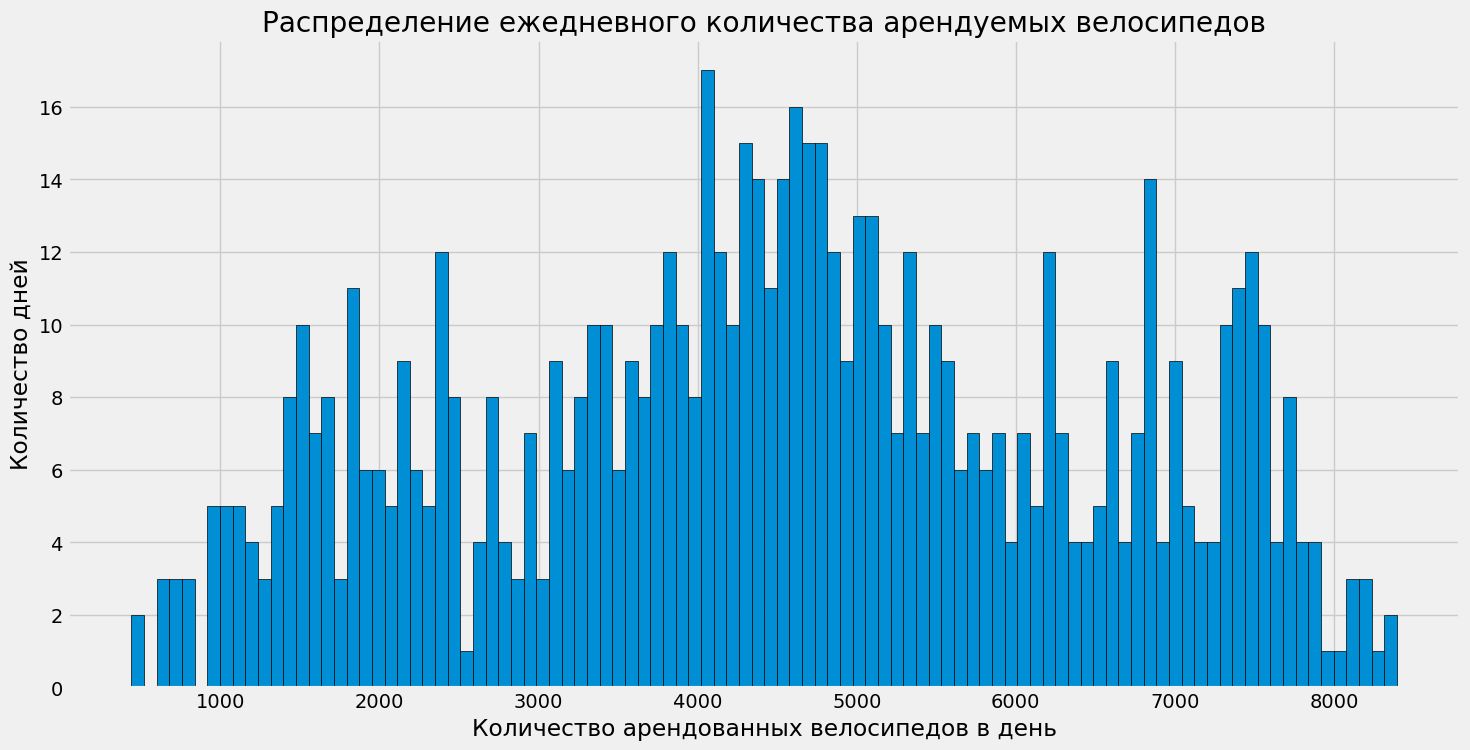

In [74]:
figsize(16, 8)

# Гистограмма по количеству арендованных велосипедов
plt.style.use('fivethirtyeight')
plt.hist(df['cnt'], bins=100, edgecolor='k')
plt.xlabel('Количество арендованных велосипедов в день')
plt.ylabel('Количество дней')
plt.title('Распределение ежедневного количества арендуемых велосипедов')

Столбцы Ticket, Cabin, Embarked также не несут никакой смысловой нагрузки для классификации. Удалим их.  

In [92]:
df.drop(['Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [93]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [94]:
df.shape

(891, 7)

In [95]:
df = df.dropna()

Заменим столбец Sex на числовые коды

In [96]:
df.replace({'male':1, 'female':0})

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
889,1,1,1,26.0,0,0,30.0000


In [97]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [98]:
df = df.replace({'male':1, 'female':0})

In [99]:
df['Parch'].value_counts()

,count
Parch,
0,521
1,110
2,68
5,5
3,5
4,4
6,1


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


Выберем целевую переменную

In [101]:
y = df['Survived']
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


Выберем другие данные для обучения

In [102]:
X = df.iloc[:, 1:]

In [103]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


преобразуем данные в массивы numpy для упрощения работы

In [104]:
y = np.array(y)
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [105]:
X = np.array(X)
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    , 19.    ,  0.    ,  0.    , 30.    ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

Разделим нашу выборку на обучающую и тестовую

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [107]:
X_train.shape

(571, 6)

In [108]:
X_test.shape

(143, 6)

Подберем параметры через сетку Grid

In [124]:
np.random.seed(42)

param_grid = {'max_features':[None, 'sqrt', 'log2'], 'ccp_alpha': [0.1, 0.01, 0.001], 'max_depth': [2, 3], 'criterion': ['gini', 'entropy']}

dec_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv = 5, verbose=True)
grid_search.fit(X_train, y_train)
best_dec_tree = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


В конце для проверки выводим результат преобразования численных признаков

In [125]:
score = accuracy_score(y_test, best_dec_tree.predict(X_test))
print('accuracy:', score)

accuracy: 0.8531468531468531


In [126]:
import matplotlib.pyplot as plt

In [127]:
df.columns[1:]

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

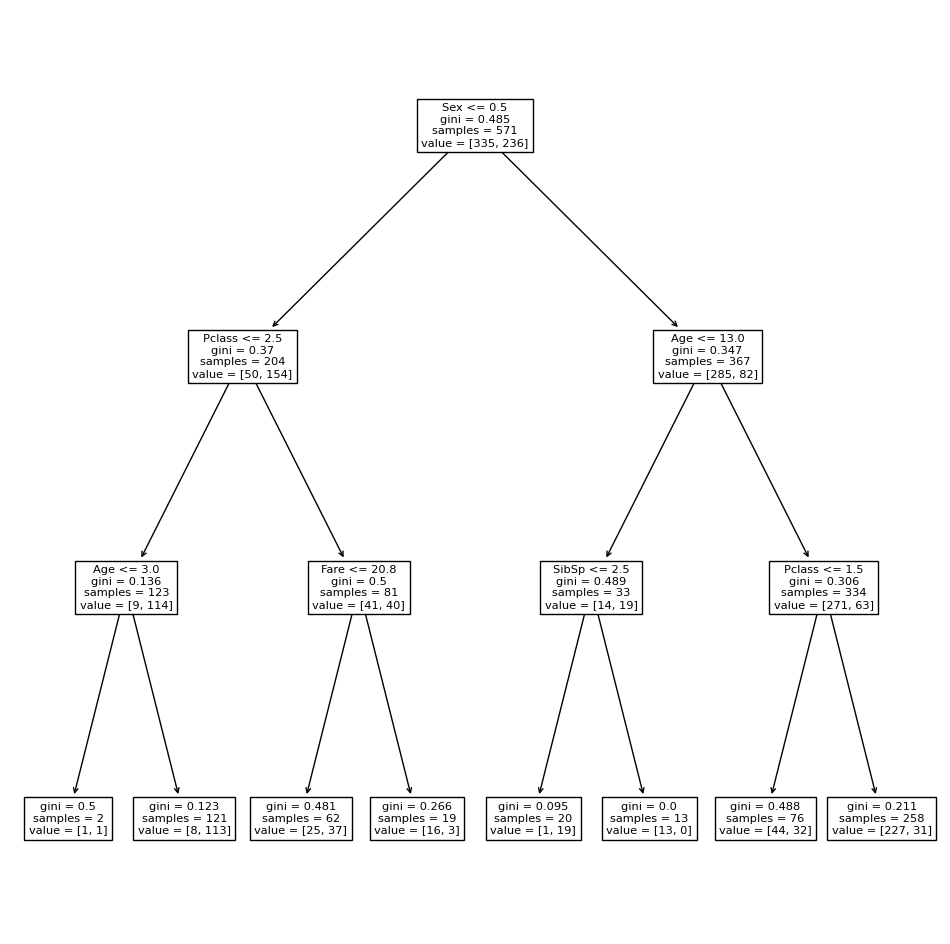

In [128]:
plt.figure(figsize=(12,12))
tree.plot_tree(best_dec_tree, feature_names = df.columns[1:]);